In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [54]:
df = pd.read_csv('draft_project_all_data.csv')

df['KR.Yds']=np.nan
df['PR.Yds']=np.nan
df['KR.TD']=np.nan
df['PR.TD']=np.nan

In [55]:
drop_cols = ['Unnamed: 0', 'Unnamed: 28_level_1', 'first_x', 'last', 'ex1', 'first_I', 'Player_y', 'Split', 'Value', 'first_y', 'Player', 'Pos_y', 'School', 'College', 'Unnamed: 0.1']

df.drop(drop_cols, axis=1, inplace=True)

In [56]:
df.groupby('Ht').count()

d = {'6-1':73, '5-10':70, '5-11':71, '6-2':74, '6-3':75, '6-4':76, '6-5':77, '5-5':65, '6-6':78, '5-6':66, '6-7':79, '5-7':67, '6-8':80, '5-8':68, '6-9':81, '5-9':69, '6-0':72}
df.Ht = df.Ht.map(d)

In [57]:
#df.drop(['TD.5', 'Yds.5'], axis=1, inplace=True)
col_map = {'Pos_x':'Pos', 'Player_x':'Player', 'Cmp_x':'NFL.Cmp', 'Att_x':'NFL.Pass.Att', 'Yds_x':'NFL.Pass.Yds', 'TD_x':'NFL.Pass.TD', 'Int_x':'NFL.Pass.Int', 'Att_x.1':'NFL.Rush.Att', 'Yds_x.1':'NFL.Rush.Yds', 'TD_x.1':'NFL.Rush.TD', 'Rec_x':'NFL.Rec', 'Yds_x.2':'NFL.Rec.Yds', 'TD_x.2':'NFL.Rec.TD', 'Solo_x':'NFL.Solo', 'Int_x.1':'NFL.Def.Int', 'Sk_x':'NFL.Sk', 'Cmp_y':'Cmp', 'Att_y':'Pass.Att', 'Yds_y':'Pass.Yds', 'TD_y':'Pass.TD', 'Int_y':'Pass.Int', 'Att.1':'Rush.Att', 'Yds.1':'Rush.Yds', 'TD.1':'Rush.TD', 'Avg.1':'Rec.Avg', 'Avg':'Rush.Avg', 'Rec_y':'Rec', 'Yds.2':'Rec.Yds', 'TD.2':'Rec.TD', 'Solo_y':'Solo', 'Int.1':'Def.Int', 'Sk_y':'Sk', 'Yds.3':'Int.Yds', 'TD.3':'Int.TD', 'Yds.4':'Fum.Yds', 'TD.4':'Fum.TD', 'Ret':'Kick.Ret', 'Ret.1':'Punt.Ret', 'Avg.2':'KR.Avg', 'Avg.3':'PR.Avg'}

df.rename(columns=col_map, inplace=True)

In [58]:
p5 = ['Boston College', 'Illinois','Baylor', 'Arizona', 'Alabama', 'Clemson', 'Indiana', 'Iowa State', 'Arizona St.', 'Arkansas', 'Duke', 'Iowa', 'Kansas', 'California', 'Auburn', 'Florida St.', 'Maryland', 'Kansas St.', 'UCLA', 'Florida', 'Georgia Tech', 'Michigan', 'Oklahoma', 'Colorado', 'Georgia', 'Louisville', 'Michigan St.', 'Oklahoma St.', 'Oregon', 'Kentucky', 'Miami (FL)', 'Minnesota', 'TCU', 'Oregon St.', 'LSU', 'North Carolina', 'Nebraska', 'Texas', 'USC', 'Mississippi', 'North Carolina St.','Northwestern', 'Texas Tech', 'Stanford', 'Mississippi St.', 'Pittsburgh', 'Ohio St.', 'West Virginia', 'Utah', 'Missouri', 'Syracuse', 'Penn St.', 'Washington', 'South Carolina', 'Virginia', 'Purdue', 'Washington St.', 'Tennessee', 'Virginia Tech', 'Rutgers', 'Texas A&M', 'Wake Forest', 'Wisconsin', 'Vanderbilt', 'Notre Dame']


def get_conf(df):
    confs = []
    for index, item in df.iterrows():
        if item['College/Univ'] in p5:
            pow5=1
        else:
            pow5=0
            
        confs.append(pow5)
        
    return confs
        
df['P5_Conf.'] = get_conf(df)

In [59]:
df['Rush.Yds'], df['Rec.Yds'], df['Pass.Yds'] = np.where((df['Pos']=='RB') & (df['Cmp'] < 6),[df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']], [df['Rush.Yds'], df['Rec.Yds'], df['Pass.Yds']])
df['Rush.Att'], df['Pass.Att'] = np.where((df['Pos']=='RB') & (df['Cmp'] < 6),[df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])
df['Rush.TD'], df['Rec.TD'], df['Pass.TD'] = np.where((df['Pos']=='RB') & (df['Cmp'] < 6),[df['Pass.TD'], df['Rush.TD'], df['Rec.TD']], [df['Rush.TD'], df['Rec.TD'], df['Pass.TD']])


In [60]:
df['Rush.Att'], df['Pass.Att'] = np.where((df['Pos']=='RB') & (df['Cmp'].isnull()), [df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])
df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD'], df['KR.Yds'], df['KR.TD'], df['Pass.Yds'], df['Pass.TD'] = np.where((df['Pos']=='RB') & (df['Cmp'].isnull()) & (df['Kick.Ret'].notnull()), [df['Pass.Yds'], df['Pass.TD'], df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD'], df['KR.Yds'], df['KR.TD']], [df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD'], df['KR.Yds'], df['KR.TD'], df['Pass.Yds'], df['Pass.TD']])
df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD'], df['Pass.Yds'], df['Pass.TD'] = np.where((df['Pos']=='RB') & (df['Cmp'].isnull()) & (df['Kick.Ret'].isnull()), [df['Pass.Yds'], df['Pass.TD'], df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD']], [df['Rush.Yds'], df['Rush.TD'], df['Rec.Yds'], df['Rec.TD'], df['Pass.Yds'], df['Pass.TD']])
df['PR.Yds'], df['PR.TD'], df['Int.Yds'], df['Int.TD'] = np.where((df['Pos']=='RB') & (df['Punt.Ret'].notnull()), [df['Int.Yds'], df['Int.TD'], df['PR.Yds'], df['PR.TD']], [df['PR.Yds'], df['PR.TD'], df['Int.Yds'], df['Int.TD']])

In [61]:
qbs = df[df['Pos']=='QB']
rbs = df[df['Pos']=='RB']


In [62]:
df['Rec.Yds'], df['Rush.Yds'], df['Pass.Yds'] = np.where((df['Pos']=='WR'),[df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']], [df['Rec.Yds'], df['Rush.Yds'], df['Pass.Yds']])
df['Rush.Att'], df['Pass.Att'] = np.where((df['Pos']=='WR'),[df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])
df['Rec.TD'], df['Rush.TD'], df['Pass.TD'] = np.where((df['Pos']=='WR'),[df['Pass.TD'], df['Rush.TD'], df['Rec.TD']], [df['Rec.TD'], df['Rush.TD'], df['Pass.TD']])
df['Rec.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='WR'),[df['Rush.Avg'], df['Rec.Avg']], [df['Rec.Avg'], df['Rush.Avg']])

In [63]:
df['KR.Yds'], df['PR.Yds'], df['Pass.Yds'], df['Rush.Yds'] =  np.where((df['Pos']=='WR') & (df['Pass.Att'].isnull()) & (df['Rush.Att'].isnull()), [df['Pass.Yds'], df['Rush.Yds'], df['KR.Yds'], df['PR.Yds']], [df['KR.Yds'], df['PR.Yds'], df['Pass.Yds'], df['Rush.Yds']])
df['KR.TD'], df['PR.TD'], df['Pass.TD'], df['Rush.TD'] =  np.where((df['Pos']=='WR') & (df['Pass.Att'].isnull()) & (df['Rush.Att'].isnull()), [df['Pass.TD'], df['Rush.TD'], df['KR.TD'], df['PR.TD']], [df['KR.TD'], df['PR.TD'], df['Pass.TD'], df['Rush.TD']])
df['KR.Avg'], df['PR.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='WR') & (df['Pass.Att'].isnull()) & (df['Rush.Att'].isnull()), [df['Rush.Avg'], df['KR.Avg'], df['PR.Avg']], [df['KR.Avg'], df['PR.Avg'], df['Rush.Avg']])
df['KR.Yds'], df['KR.TD'], df['PR.Yds'], df['PR.TD'], df['Pass.Yds'], df['Pass.TD'], df['Int.Yds'], df['Int.TD'] = np.where((df['Pos']=='WR') & (df['Pass.Att'].isnull()) & (df['Rush.Att'].notnull()), [df['Pass.Yds'], df['Pass.TD'], df['Int.Yds'], df['Int.TD'], df['KR.Yds'],df['KR.TD'], df['PR.Yds'], df['PR.TD']], [df['KR.Yds'], df['KR.TD'], df['PR.Yds'], df['PR.TD'], df['Pass.Yds'], df['Pass.TD'], df['Int.Yds'], df['Int.TD']])

In [64]:
wrs = df[df['Pos']=='WR']


In [65]:
df['Rec.Yds'], df['Rush.Yds'], df['Pass.Yds'] = np.where((df['Pos']=='TE'),[df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']], [df['Rec.Yds'], df['Rush.Yds'], df['Pass.Yds']])
df['Rush.Att'], df['Pass.Att'] = np.where((df['Pos']=='TE'),[df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])
df['Rec.TD'], df['Rush.TD'], df['Pass.TD'] = np.where((df['Pos']=='TE'),[df['Pass.TD'], df['Rush.TD'], df['Rec.TD']], [df['Rec.TD'], df['Rush.TD'], df['Pass.TD']])
df['Rec.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='TE'),[df['Rush.Avg'], df['Rec.Avg']], [df['Rec.Avg'], df['Rush.Avg']])

In [66]:
tes = df[df['Pos']=='TE']

In [67]:
df['Rush.Yds'], df['Rec.Yds'], df['KR.Yds'], df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'] = np.where((df['Player']=='Brandon Boykin'), [df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'], df['Int.Yds'], df['Fum.Yds'], df['KR.Yds'], df['PR.Yds']], [df['Rush.Yds'], df['Rec.Yds'], df['KR.Yds'], df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds']])
df['Rush.TD'], df['Rec.TD'], df['KR.TD'], df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'] = np.where((df['Player']=='Brandon Boykin'), [df['Pass.TD'], df['Rush.TD'], df['Rec.TD'], df['Int.TD'], df['Fum.TD'], df['KR.TD'], df['PR.TD']], [df['Rush.TD'], df['Rec.TD'], df['KR.TD'], df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD']])
df['Rush.Att'], df['Pass.Att'] = np.where(df['Player']=='Brandon Boykin', [df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])


In [68]:
df['Rush.Yds'], df['KR.Yds'], df['PR.Yds'], df['Pass.Yds'], df['Rec.Yds'] = np.where((df['Player']=='Shiloh Keo'), [df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'], df['KR.Yds'], df['PR.Yds']], [df['Rush.Yds'], df['KR.Yds'], df['PR.Yds'], df['Pass.Yds'], df['Rec.Yds']])
df['Rush.TD'], df['KR.TD'], df['PR.TD'], df['Pass.TD'], df['Rec.TD'] = np.where((df['Player']=='Shiloh Keo'), [df['Pass.TD'], df['Rush.TD'], df['Rec.TD'], df['KR.TD'], df['PR.TD']], [df['Rush.TD'], df['KR.TD'], df['PR.TD'], df['Pass.TD'], df['Rec.TD']])
df['Rush.Att'], df['Pass.Att'] = np.where(df['Player']=='Shiloh Keo', [df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']])

In [69]:
df['Def.Int'], df['Pass.Int'] = np.where((df['Pos'] =='DB'), [df['Pass.Int'], df['Def.Int']], [df['Def.Int'], df['Pass.Int']])
df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].isnull()) & (df['Punt.Ret'].isnull()), [df['Pass.Yds'], df['Rush.Yds'], df['Int.Yds'], df['Fum.Yds']], [df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds']])
df['KR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].isnull()), [df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'], df['Int.Yds'], df['Fum.Yds'], df['KR.Yds']], [df['KR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']])
df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].isnull()) & (df['Punt.Ret'].notnull()), [df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'], df['Int.Yds'], df['Fum.Yds'], df['PR.Yds']], [df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']])
df['KR.Yds'], df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].notnull()) & (df['Player']!='Brandon Boykin') & (df['Player']!='Shiloh Keo'), [df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds'], df['Int.Yds'], df['Fum.Yds'], df['KR.Yds'], df['PR.Yds']], [df['KR.Yds'], df['PR.Yds'], df['Int.Yds'], df['Fum.Yds'], df['Pass.Yds'], df['Rush.Yds'], df['Rec.Yds']])

In [70]:
df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].isnull()) & (df['Punt.Ret'].isnull()), [df['Pass.TD'], df['Rush.TD'], df['Int.TD'], df['Fum.TD']], [df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD']])
df['KR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].isnull()), [df['Pass.TD'], df['Rush.TD'], df['Rec.TD'], df['Int.TD'], df['Fum.TD'], df['KR.TD']], [df['KR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD']])
df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].isnull()) & (df['Punt.Ret'].notnull()), [df['Pass.TD'], df['Rush.TD'], df['Rec.TD'], df['Int.TD'], df['Fum.TD'], df['PR.TD']], [df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD']])
df['KR.TD'], df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD'] = np.where((df['Pos']=='DB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].notnull()) & (df['Player']!='Brandon Boykin') & (df['Player']!='Shiloh Keo'), [df['Pass.TD'], df['Rush.TD'], df['Rec.TD'], df['Int.TD'], df['Fum.TD'], df['KR.TD'], df['PR.TD']], [df['KR.TD'], df['PR.TD'], df['Int.TD'], df['Fum.TD'], df['Pass.TD'], df['Rush.TD'], df['Rec.TD']])

In [71]:
df['KR.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='DB') & df['Kick.Ret'].notnull() & df['Punt.Ret'].isnull(), [df['Rush.Avg'], df['KR.Avg']], [df['KR.Avg'], df['Rush.Avg']])
df['PR.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='DB') & df['Kick.Ret'].isnull() & df['Punt.Ret'].notnull(), [df['Rush.Avg'], df['PR.Avg']], [df['PR.Avg'], df['Rush.Avg']])
df['KR.Avg'], df['PR.Avg'], df['Rush.Avg'], df['Rec.Avg'] = np.where((df['Pos']=='DB') & df['Kick.Ret'].notnull() & df['Punt.Ret'].notnull() & (df['Player']!='Brandon Boykin') & (df['Player']!='Shiloh Keo'), [df['Rush.Avg'], df['Rec.Avg'], df['KR.Avg'], df['PR.Avg']], [df['KR.Avg'], df['PR.Avg'], df['Rush.Avg'], df['Rec.Avg']])

In [72]:
df.drop(1642, inplace=True)

In [73]:
df['KR.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='CB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].isnull()) & (df['Pass.Att'].isnull()), [df['Rush.Avg'], df['KR.Avg']], [df['KR.Avg'], df['Rush.Avg']])
df['PR.Avg'], df['Rush.Avg'] = np.where((df['Pos']=='CB') & (df['Kick.Ret'].isnull()) & (df['Punt.Ret'].notnull()) & (df['Pass.Att'].isnull()), [df['Rush.Avg'], df['PR.Avg']], [df['PR.Avg'], df['Rush.Avg']])
df['KR.Avg'], df['PR.Avg'], df['Rush.Avg'], df['Rec.Avg'] = np.where((df['Pos']=='CB') & (df['Kick.Ret'].notnull()) & (df['Punt.Ret'].notnull()) & (df['Pass.Att'].isnull()), [df['Rush.Avg'], df['Rec.Avg'], df['KR.Avg'], df['PR.Avg']], [df['KR.Avg'], df['PR.Avg'], df['Rush.Avg'], df['Rec.Avg']])
df['Rush.Att'], df['Pass.Att'] = np.where((df['Pos']=='CB') & (df['Pass.Att'].notnull()), [df['Pass.Att'], df['Rush.Att']], [df['Rush.Att'], df['Pass.Att']]) 

In [74]:
cbs = df[(df['Pos']== 'CB')]
dbs = df[(df['Pos']=='DB') | (df['Pos']=='CB') | (df['Pos']=='S')]

In [75]:
dline_pos = ['DE', 'DT', 'DL', 'NT']
# |(df['Pos']=='DT')|(df['Pos']=='NT')|(df['Pos']=='DL')
df['Rush.Att'], df['Pass.Att'], df['Int.Yds'], df['Int.TD'], df['Rush.Yds'], df['Rush.TD'] = np.where((df.Pos.str.startswith(tuple(dline_pos))) & (df['Pass.Att'].notnull()), [df['Pass.Att'], df['Rush.Att'], df['Rush.Yds'], df['Rush.TD'], df['Int.Yds'], df['Int.TD']], [df['Rush.Att'], df['Pass.Att'], df['Int.Yds'], df['Int.TD'], df['Rush.Yds'], df['Rush.TD']])
df['Int.Yds'], df['Int.TD'], df['Rush.Yds'], df['Rush.TD'] = np.where((df.Pos.str.startswith(tuple(dline_pos))) & (df['Rush.Att'].isnull()), [df['Rush.Yds'], df['Rush.TD'], df['Int.Yds'], df['Int.TD']], [df['Int.Yds'], df['Int.TD'], df['Rush.Yds'], df['Rush.TD']])
df['Def.Int'], df['Pass.Int'] = np.where((df.Pos.str.startswith(tuple(dline_pos))) & (df['Pass.Int'].notnull()), [df['Pass.Int'], df['Def.Int']], [df['Def.Int'], df['Pass.Int']])

In [76]:
dline = df[(df['Pos']=='DE') | (df['Pos']=='DT') | (df['Pos']=='DL') | (df['Pos']=='NT')]
#looks like fumble return yards data was lost for d linemen
#A couple problems with this data but the important stuff is right. No one is drafting a d-lineman based on his 
#kick returning or rushing ability

In [77]:
lbs = df[(df['Pos']=='ILB') | (df['Pos']=='LB') | (df['Pos']=='OLB')]

In [78]:
lbs_pos = ['ILB', 'LB', 'OLB']
#df['Rush.Att'], df['Rush.Yds'], df['Rush.TD'], df['Def.Int'], df['Pass.Att'], df['Pass.Yds'], df['Pass.TD'], df['Pass.Int'] = np.where(((df['Pos']=='LB')|(df['Pos']=='ILB')|(df['Pos']=='OLB')) & (df['Pass.Att'].notnull()) & (df['Cmp'].isnull()), [df['Pass.Att'], df['Pass.Yds'], df['Pass.TD'], df['Pass.Int'], df['Rush.Att'], df['Rush.Yds'], df['Rush.TD'], df['Def.Int']], [df['Rush.Att'], df['Rush.Yds'], df['Rush.TD'], df['Def.Int'], df['Pass.Att'], df['Pass.Yds'], df['Pass.TD'], df['Pass.Int']])
df['Int.Yds'], df['Int.TD'], df['Def.Int'], df['Pass.Int'], df['Pass.Yds'], df['Pass.TD']= np.where((df.Pos.str.startswith(tuple(lbs_pos))), [df['Pass.Yds'], df['Pass.TD'], df['Pass.Int'], df['Def.Int'], df['Int.Yds'], df['Int.TD']], [df['Int.Yds'], df['Int.TD'], df['Def.Int'], df['Pass.Yds'], df['Pass.TD'], df['Pass.Int']])

In [80]:
oline = df[(df['Pos']=='T') | (df['Pos']=='G') | (df['Pos']=='C') | (df['Pos']=='OL')]

In [83]:
lbs = df[(df['Pos']=='ILB') | (df['Pos']=='LB') | (df['Pos']=='OLB')]

df = pd.concat([qbs, rbs, wrs, tes, lbs, dbs, dline, oline])


In [84]:
df.to_csv('cleaner_draft_data_10_20.csv')


After running these where clauses, the data should be pretty clean. It's not perfect and some stats got lost, but all the relevant stats are intact. For example, fumble return yards was lost for defensive linemen, but that likely factors very little into where they get drafted since those are a bit of a random stat, especially for that position. There may also be some kick returns misattributed as rushing or passing stats, but again those likely factor in very little to the draft position of defensive linemen, linebackers and tight ends. I could spend hours more making sure every record is perfect, but I believe this data is enough as it is.

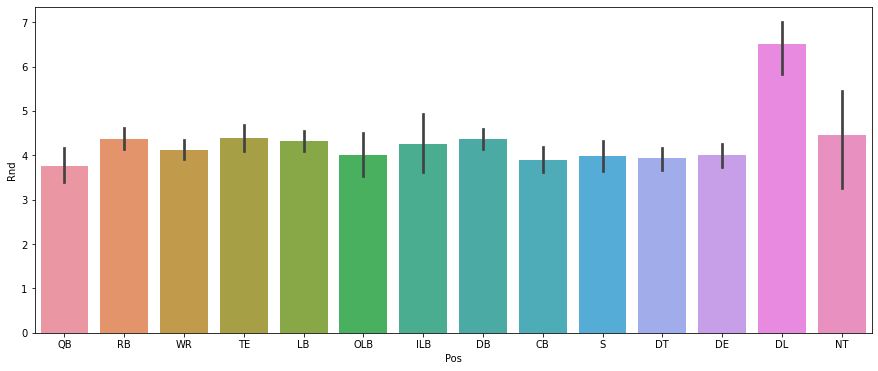

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.barplot(x='Pos', y='Rnd', data=df)

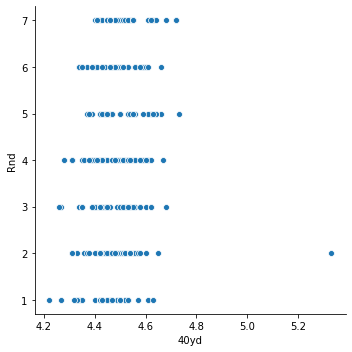

In [30]:


sns.relplot(x='40yd', y='Rnd', data=wrs)

Text(0.5, 1.0, 'Avg 1st Round Draft Pick')

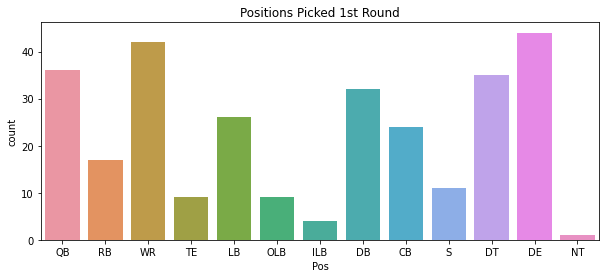

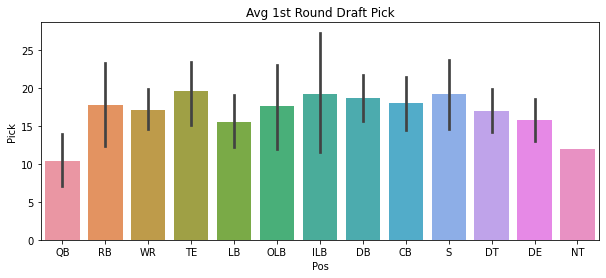

In [31]:
rnd1 = df[df['Rnd']==1]

plt.figure(figsize=(10, 4))
sns.countplot(x='Pos', data=rnd1)
plt.title('Positions Picked 1st Round')

plt.figure(figsize=(10, 4))
sns.barplot(x='Pos', y='Pick', data=rnd1)
plt.title('Avg 1st Round Draft Pick')



Slope: -1.189290459139241 Intercept: 283.26774156308073
Correlation: -0.272340359961408


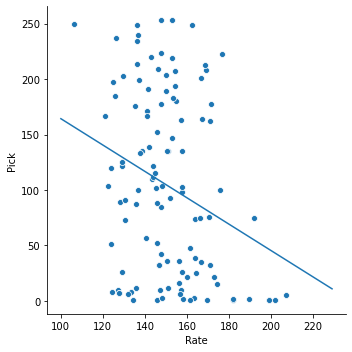

In [32]:
qbsna = qbs[qbs['Rate'].notna()]

a, b = np.polyfit(qbsna['Rate'], qbsna['Pick'], 1)
x = np.arange(100, 230)
sns.relplot(x='Rate', y='Pick', data=qbs)
plt.plot(x, (a*x+b))
print('Slope:', a, 'Intercept:', b)

r = np.corrcoef(qbsna['Rate'], qbsna['Pick'])

print('Correlation:', r[0,1])

Slope: -0.020735230161312356 Intercept: 174.82460914789917
Correlation: -0.21923184107924648


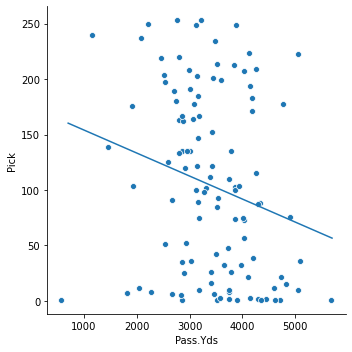

In [33]:
qbsyd = qbs[qbs['Pass.Yds'].notna()]

sns.relplot(x='Pass.Yds', y='Pick', data=qbsyd)
a, b = np.polyfit(qbsyd['Pass.Yds'], qbsyd['Pick'], 1)
x = np.arange(700, 5700)
plt.plot(x, a*x+b)
print('Slope:', a, 'Intercept:', b)

r = np.corrcoef(qbsyd['Pass.Yds'], qbsyd['Pick'])

print('Correlation:', r[0,1])

Slope: -2.658394173325248 Intercept: 175.2028688256319
Correlation: -0.3058036742761542


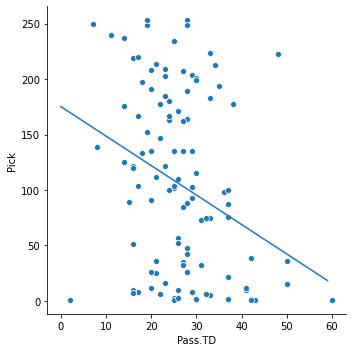

In [34]:
qbstd = qbs[qbs['Pass.TD'].notna()]

sns.relplot(x='Pass.TD', y='Pick', data=qbsyd)
a, b = np.polyfit(qbstd['Pass.TD'], qbstd['Pick'], 1)
x = np.arange(0, 60)
plt.plot(x, a*x+b)
print('Slope:', a, 'Intercept:', b)

r = np.corrcoef(qbstd['Pass.TD'], qbstd['Pick'])

print('Correlation:', r[0,1])

In [35]:
qbs = qbs[qbs['Pass.Att'].notnull()]

rel_stats_qb = qbs.columns[:5].append(qbs.columns[28:39].append(qbs.columns[70:78].append(qbs.columns[83:84])))

qbs_rel = qbs[rel_stats_qb].reset_index()

qbs_rel.drop('Bench', axis=1, inplace=True)
qbs_rel.at[20, 'Ht'] = 74
qbs_rel.at[20, 'Wt'] = 223
qbs_rel.at[29, 'Ht'] = 77
qbs_rel.at[29, 'Wt'] = 238

qbs_rel = qbs_rel[qbs_rel['Ht'].notna()]

display(qbs_rel)

,index,Rnd,Pick,Tm,Player,Pos,Cmp,Pass.Att,Pct,Pass.Yds,Pass.TD,Pass.Int,Rate,Rush.Att,Rush.Yds,Rush.Avg,Rush.TD,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,P5_Conf.
0,0,1,1,STL,Sam Bradford,QB,39.0,69.0,56.5,562.0,2.0,0.0,134.5,4.0,-18.0,-4.5,0.0,76.0,236.0,4.79,NaN,NaN,NaN,NaN,1
1,24,1,25,DEN,Tim Tebow,QB,213.0,314.0,67.8,2895.0,21.0,5.0,164.2,217.0,910.0,4.2,14.0,75.0,236.0,4.71,38.5,115.0,6.66,4.17,1
2,47,2,48,CAR,Jimmy Clausen,QB,289.0,425.0,68.0,3722.0,28.0,4.0,161.4,59.0,-95.0,-1.6,3.0,75.0,222.0,4.76,NaN,NaN,NaN,NaN,1
3,85,3,85,CLE,Colt McCoy,QB,332.0,470.0,70.6,3521.0,27.0,12.0,147.4,129.0,348.0,2.7,3.0,73.0,216.0,4.79,NaN,114.0,NaN,NaN,1
4,123,4,122,PHI,Mike Kafka,QB,319.0,492.0,64.8,3430.0,16.0,12.0,129.3,150.0,295.0,2.0,8.0,75.0,225.0,4.93,32.0,110.0,6.96,4.37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2706,4,122,IND,Jacob Eason,QB,260.0,405.0,64.2,3132.0,23.0,8.0,143.9,46.0,-69.0,-1.5,1.0,78.0,231.0,4.89,27.5,110.0,7.50,4.75,1
109,2709,4,125,NYJ,James Morgan,QB,207.0,357.0,58.0,2585.0,14.0,5.0,128.9,32.0,-40.0,-1.3,2.0,76.0,229.0,4.89,29.0,112.0,7.51,4.64,0
110,2752,5,167,BUF,Jake Fromm,QB,234.0,385.0,60.8,2860.0,24.0,5.0,141.2,38.0,-12.0,-0.3,0.0,74.0,219.0,5.01,30.0,111.0,7.27,4.51,1
111,2774,6,189,JAX,Jake Luton,QB,222.0,358.0,62.0,2714.0,28.0,3.0,149.8,44.0,-87.0,-2.0,1.0,78.0,224.0,NaN,NaN,NaN,NaN,NaN,1


In [36]:
for i in qbs_rel.columns[-6:-1]:
    qbs_rel[i].fillna(qbs_rel[i].mean(), inplace=True)

In [37]:
rel_stats_qb = list(rel_stats_qb)
rel_stats_qb.remove('Bench')


In [38]:
qbs_info = qbs_rel[['index', 'Player', 'Pos']]

C:\Python\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Python\Anaconda\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Python\Anaconda\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
<ipython-input-39-4c824635f812>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


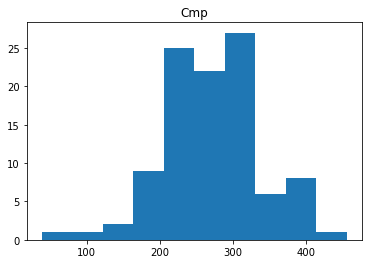

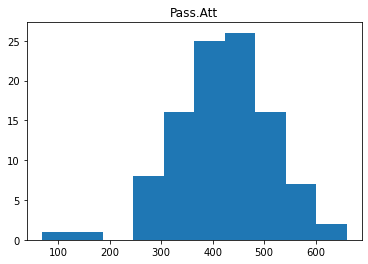

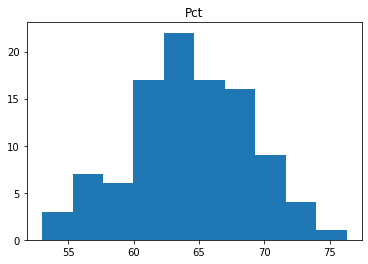

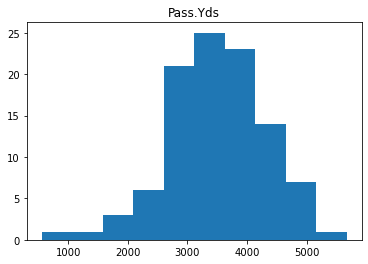

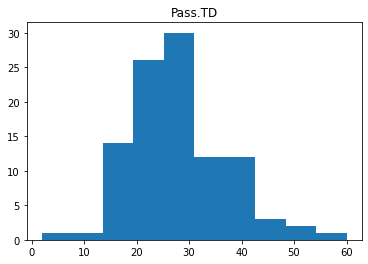

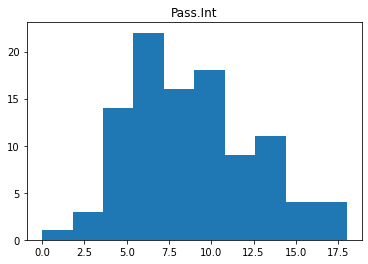

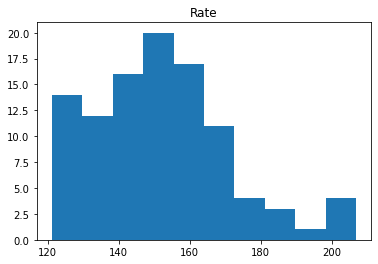

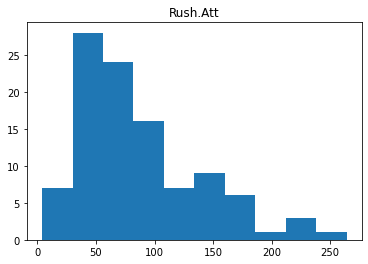

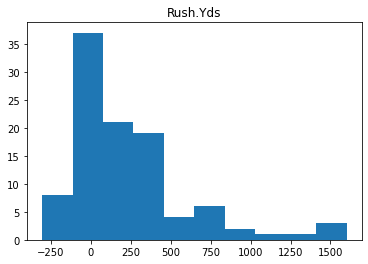

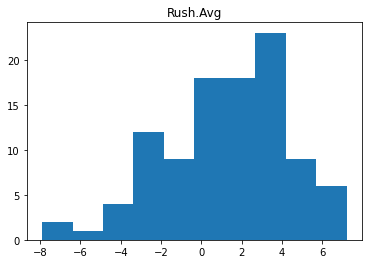

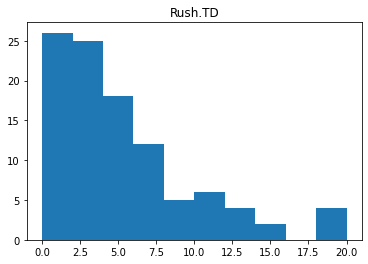

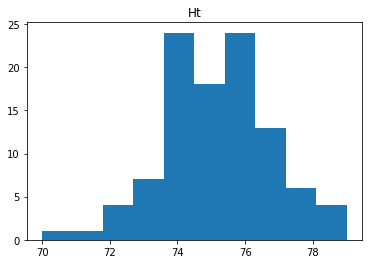

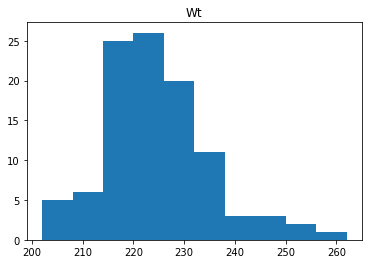

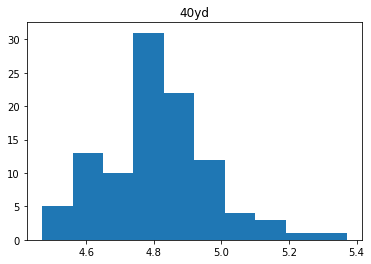

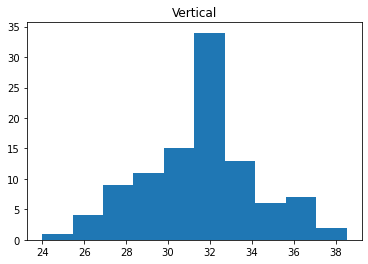

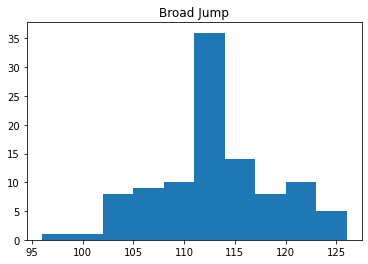

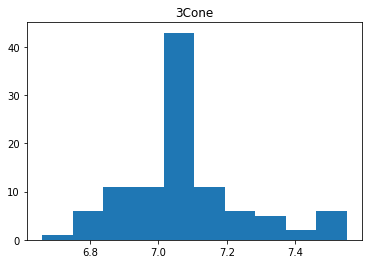

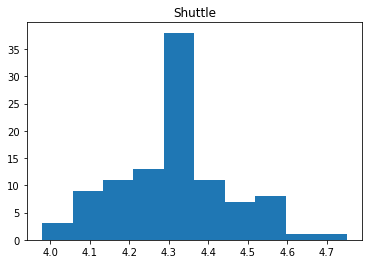

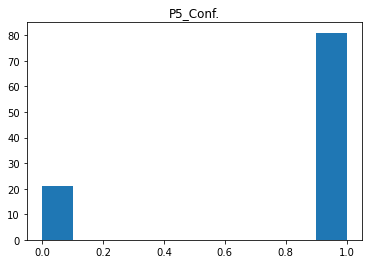

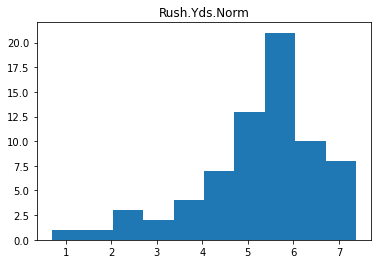

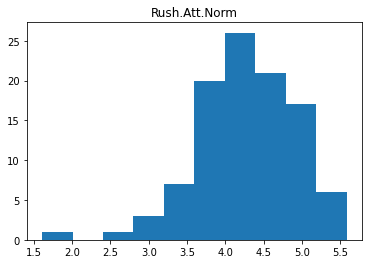

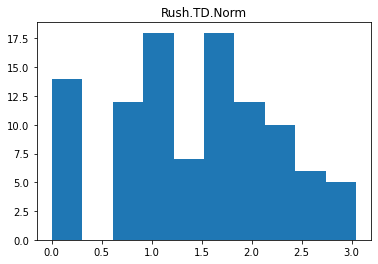

In [39]:
qbs_rel['Rush.Yds.Norm'] = np.log1p(qbs_rel['Rush.Yds'])
qbs_rel['Rush.Att.Norm'] = np.log1p(qbs_rel['Rush.Att'])
qbs_rel['Rush.TD.Norm'] = np.log1p(qbs_rel['Rush.TD'])

for i in qbs_rel.columns[6:]:
    plt.figure()
    plt.hist(qbs_rel[i])
    plt.title(i)

In [40]:
qbs_rel.fillna(0, inplace=True)
qbs_rel.drop(['Rush.Att', 'Rush.Yds', 'Rush.TD'], axis=1, inplace=True)
cols = qbs_rel.columns[6:]
cols = list(cols)
cols.append('index')

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
rid = Ridge()

X = qbs_rel[qbs_rel.columns[6:]]
y = qbs_rel['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

r2_cv = cross_val_score(rid, X, y, cv=5, scoring='r2')

mse = cross_val_score(rid, X, y, cv=5, scoring='neg_mean_squared_error')

print('R^2 Results:', r2_cv)
print('Mean R^2:', np.mean(r2_cv))
print('MSE Results:', mse)
print('Mean MSE:', np.mean(mse))



R^2 Results: [-0.00972501  0.02617995 -1.4074171   0.15147107  0.02257957]
Mean R^2: -0.2433823039549881
MSE Results: [ -5589.63618468  -5151.56104803 -10141.02785631  -5955.10334491
  -6946.71268279]
Mean MSE: -6756.808223343204


In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

X = qbs_rel[qbs_rel.columns[6:]]
y = qbs_rel['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

r2_cv = cross_val_score(knn, X, y, cv=5, scoring='r2')

mse = cross_val_score(knn, X, y, cv=5, scoring='neg_mean_squared_error')

print('R^2 Results:', r2_cv)
print('Mean R^2:', np.mean(r2_cv))
print('MSE Results:', mse)
print('Mean MSE:', np.mean(mse))

R^2 Results: [-0.11722373 -0.2909364  -0.47196213 -0.20850823 -0.0193376 ]
Mean R^2: -0.2215936167866221
MSE Results: [-6184.72761905 -6829.12380952 -6200.508      -8481.492
 -7244.626     ]
Mean MSE: -6988.095485714286


,index,Round,Player,Pos
0,523,2,Ryan Tannehill,QB
1,785,1,EJ Manuel,QB
2,85,1,Colt McCoy,QB
3,266,1,Blaine Gabbert,QB
4,1547,6,Jared Goff,QB
5,1893,1,Davis Webb,QB
6,769,2,Chandler Harnish,QB
7,1689,1,Cardale Jones,QB
8,2140,1,Mason Rudolph,QB
9,2429,1,Will Grier,QB


Accuracy: 0.38095238095238093


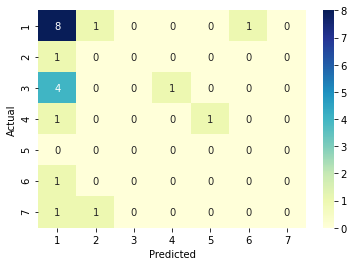

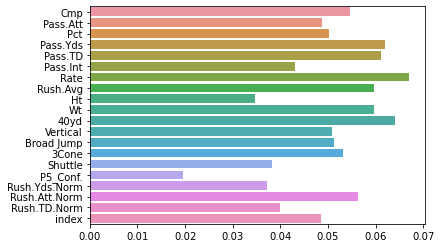

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf = RandomForestClassifier()

X = qbs_rel[cols]
y = qbs_rel['Rnd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = rf.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc = model.score(X_test, y_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d', xticklabels=['1', '2', '3', '4', '5', '6', '7'], yticklabels=['1', '2', '3', '4', '5', '6', '7'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

#acc_cv = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

#roc_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

output = pd.DataFrame({'index':X_test['index'], 'Round':y_predict})
pred_df = output.merge(qbs_info, how='left', on='index')
display(pred_df)

print('Accuracy:', acc)

plt.figure()
sns.barplot(model.feature_importances_, X.columns)


Accuracy: 0.23809523809523808


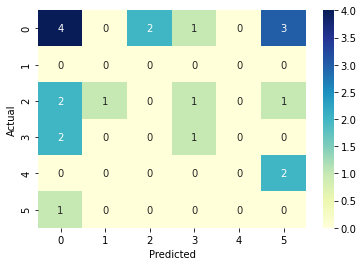

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

X = qbs_rel[qbs_rel.columns[6:]]
y = qbs_rel['Rnd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = knn.fit(X_train, y_train)

y_predict = model.predict(X_test)

acc = model.score(X_test, y_test)

cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, cmap='YlGnBu', annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')

#acc_cv = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

#roc_auc = cross_val_score(knn, X, y, cv=5, scoring='roc_auc')

print('Accuracy:', acc)

In [45]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

X = qbs_rel[cols]
y = qbs_rel['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

output = pd.DataFrame({'index':X_test['index'], 'Pick':y_predict})
pred_df = output.merge(qbs_info, how='left', on='index')
display(pred_df.sort_values('Pick'))

r2_cv = cross_val_score(rid, X, y, cv=5, scoring='r2')

mse = cross_val_score(rid, X, y, cv=5, scoring='neg_mean_squared_error')

print('R^2 Results:', r2_cv)
print('Mean R^2:', np.mean(r2_cv))
print('MSE Results:', mse)
print('Mean MSE:', np.mean(mse))

,index,Pick,Player,Pos
0,2063,23.25,Baker Mayfield,QB
16,1685,40.01,Dak Prescott,QB
20,1244,41.31,Tajh Boyd,QB
2,591,59.17,Russell Wilson,QB
7,123,61.41,Mike Kafka,QB
15,1753,69.69,Brandon Allen,QB
18,264,74.69,Jake Locker,QB
12,2286,91.51,Danny Etling,QB
3,332,92.86,Ryan Mallett,QB
14,1032,92.89,Blake Bortles,QB


R^2 Results: [-0.05556329  0.02439141 -1.44623209  0.10710875 -0.13077143]
Mean R^2: -0.30021332911107335
MSE Results: [ -5843.38775428  -5161.02250906 -10304.53250462  -6266.44475777
  -8036.60737545]
Mean MSE: -7122.398980236087


In [46]:
dbs_rel_cols = dbs.columns[:5].append(dbs.columns[43:60].append(dbs.columns[70:78].append(dbs.columns[79:])))

dbs_rel = dbs[dbs_rel_cols].reset_index()

for i in dbs_rel.columns[22:30]:
    dbs_rel[i].fillna(dbs_rel[i].mean(), inplace=True)
    
for i in dbs_rel.columns:
    dbs_rel[i].fillna(0, inplace=True)

dbs_rel.loc[dbs_rel['Player']=='Brandon Boykin']

,index,Rnd,Pick,Tm,Player,Pos,Solo,Ast,Tot,Loss,Sk,Def.Int,Int.Yds,Int.TD,PD,FR,Fum.Yds,Fum.TD,FF,Kick.Ret,KR.Avg,Punt.Ret,PR.Avg,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,KR.Yds,PR.Yds,KR.TD,PR.TD,P5_Conf.
124,639,4,123,PHI,Brandon Boykin,DB,35.0,20.0,55.0,11.0,0.0,3.0,-1.0,0.0,12.0,0.0,0.0,0.0,2.0,38.0,22.4,14.0,12.9,69.0,182.0,4.44,35.794721,15.931953,122.256484,6.922782,0.0,850.0,180.0,0.0,1.0,1


C:\Python\Anaconda\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-47-9f87a3ef8009>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


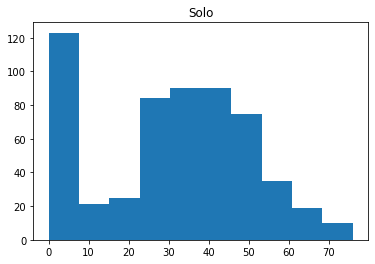

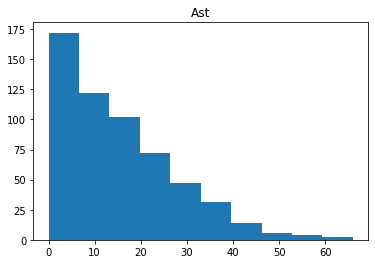

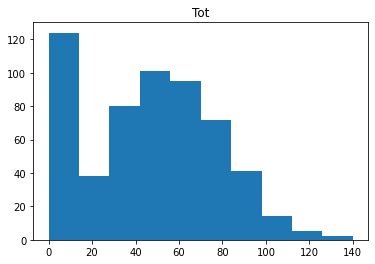

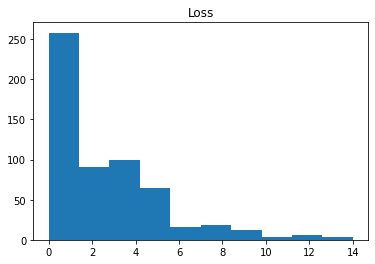

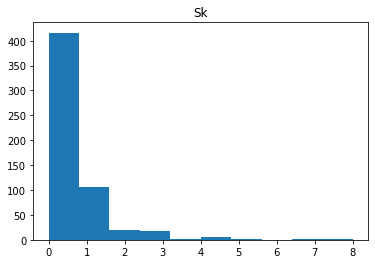

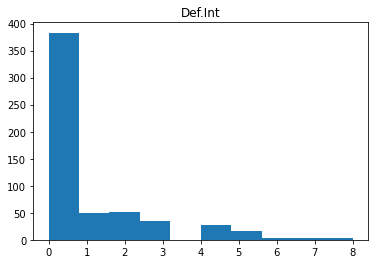

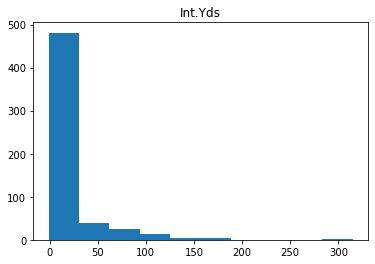

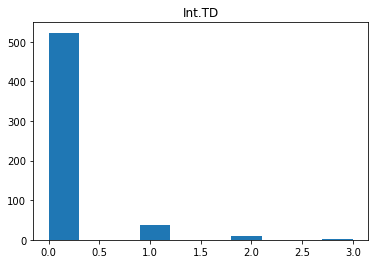

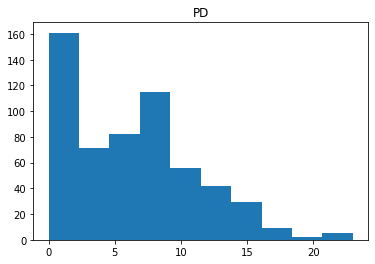

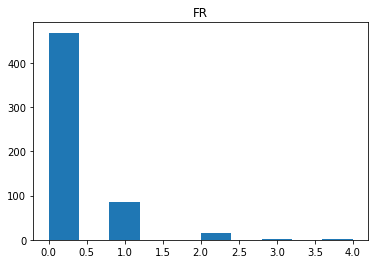

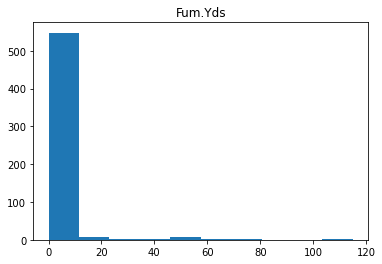

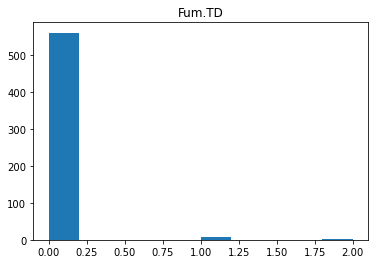

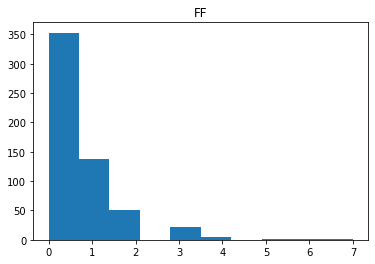

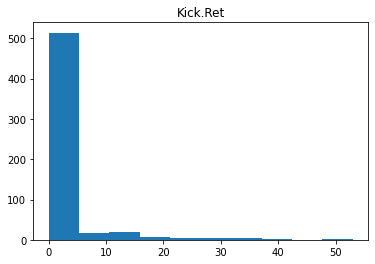

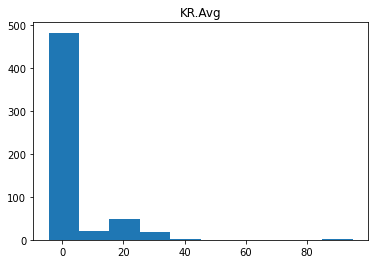

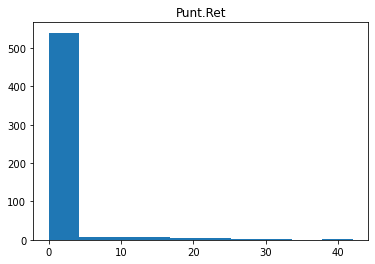

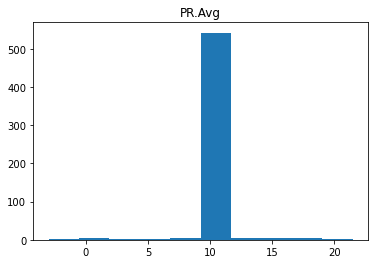

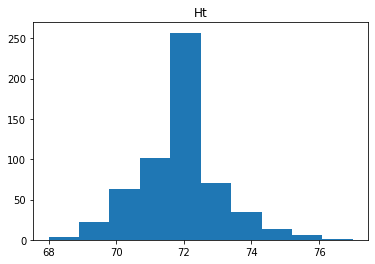

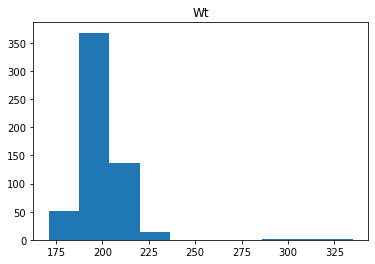

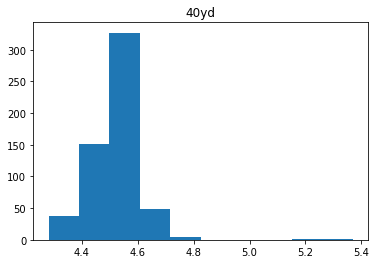

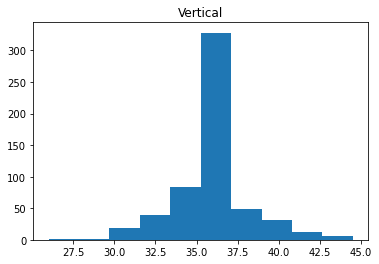

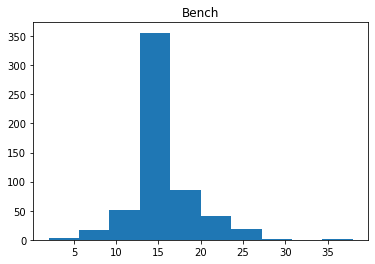

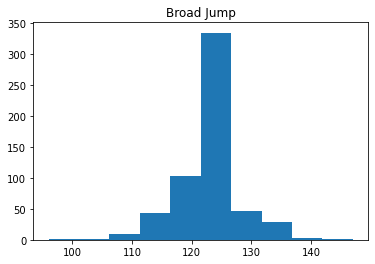

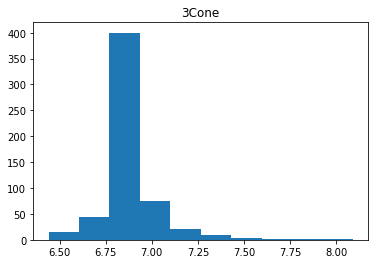

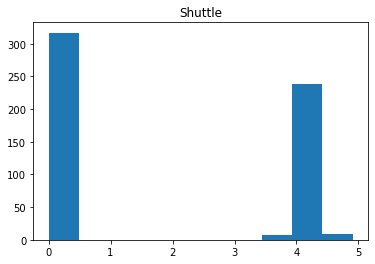

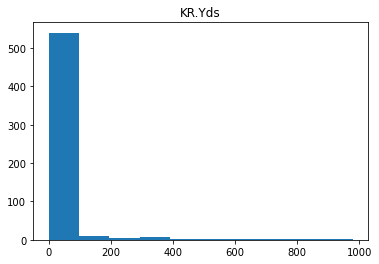

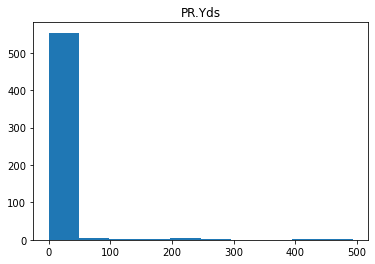

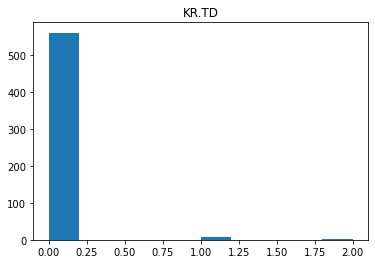

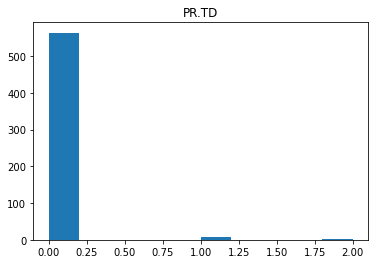

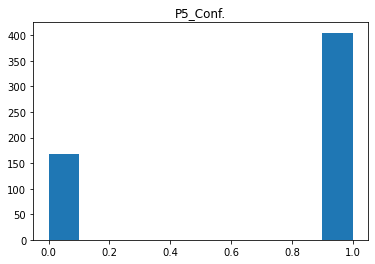

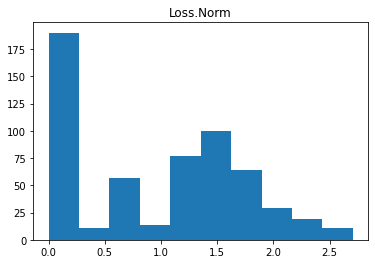

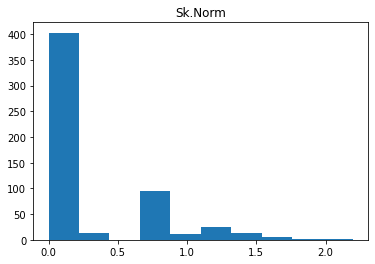

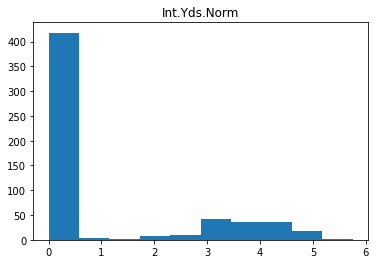

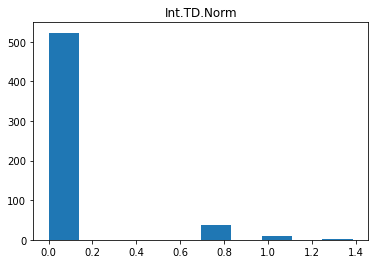

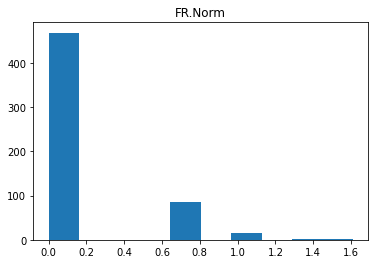

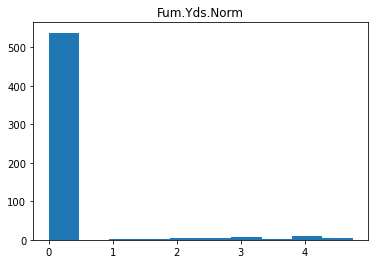

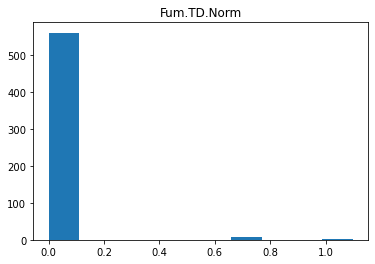

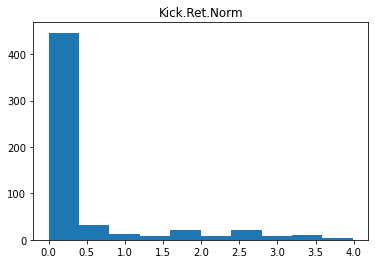

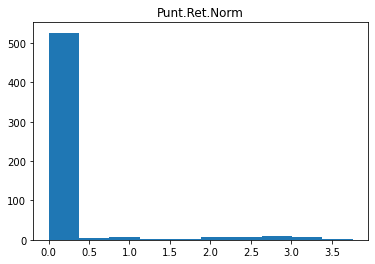

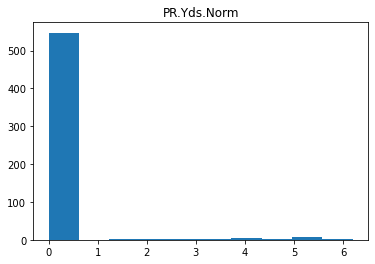

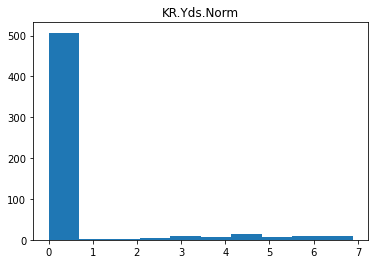

In [47]:
dbs_nnorm = ['Loss', 'Sk', 'Int.Yds', 'Int.TD', 'FR', 'Fum.Yds', 'Fum.TD', 'Kick.Ret', 'Punt.Ret', 'PR.Yds', 'KR.Yds']

for i in dbs_nnorm:
    dbs_rel[str(i)+'.Norm'] = np.log1p(dbs_rel[i])
    
dbs_rel.at[124, 'Int.Yds.Norm'] = 0
dbs_rel.at[233, 'Int.Yds.Norm'] = 0

for i in dbs_rel.columns[6:]:
    plt.figure()
    plt.hist(dbs_rel[i])
    plt.title(i)

In [48]:
dbs_info = dbs_rel[['index', 'Player', 'Pos']]

dbs_rel.drop(dbs_nnorm, axis=1, inplace=True)

cols = dbs_rel.columns[6:]
cols = list(cols)
cols.append('index')

,index,Pick,Player,Pos
44,2066,47.26,Denzel Ward,CB
78,1338,65.97,Ronald Darby,CB
39,1571,74.02,Artie Burns,CB
106,306,76.96,Marcus Gilchrist,DB
91,1830,77.38,Gareon Conley,CB
...,...,...,...,...
56,1531,194.84,Ifo Ekpre-Olomu,CB
81,1613,207.61,Kevin Byard,S
94,2822,217.80,Thakarius Keyes,CB
105,1539,218.11,Akeem King,DB


R^2 Results: [ 0.10009627 -0.13232799  0.10571737  0.11986656 -0.0547424 ]
Mean R^2: 0.02772196352276084
MSE Results: [-4659.53658282 -5565.70636978 -4513.1535564  -4446.98566843
 -5422.79944647]
Mean MSE: -4921.636324780857


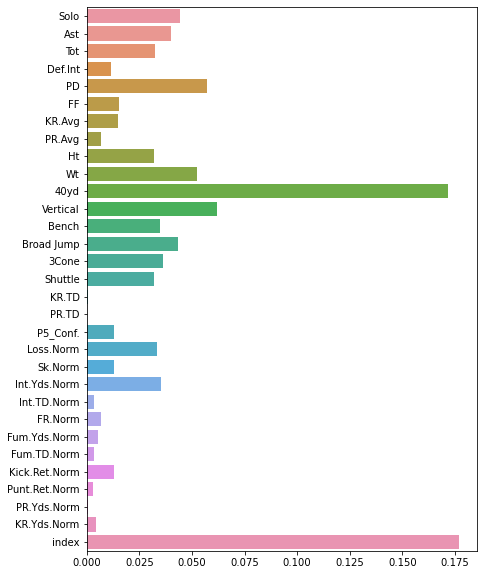

In [49]:
rfr = RandomForestRegressor()

X = dbs_rel[cols]
y = dbs_rel['Pick']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = rfr.fit(X_train, y_train)

y_predict = model.predict(X_test)

output = pd.DataFrame({'index':X_test['index'], 'Pick':y_predict})
pred_df = output.merge(dbs_info, how='left', on='index')
display(pred_df.sort_values('Pick'))

r2_cv = cross_val_score(rid, X, y, cv=5, scoring='r2')

mse = cross_val_score(rid, X, y, cv=5, scoring='neg_mean_squared_error')

print('R^2 Results:', r2_cv)
print('Mean R^2:', np.mean(r2_cv))
print('MSE Results:', mse)
print('Mean MSE:', np.mean(mse))

plt.figure(figsize = (7, 10))
sns.barplot(model.feature_importances_, X.columns)